In [61]:
import pandas as pd

In [62]:
df = pd.read_csv('tree_synthetic.csv')
df.head()

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Mild,Indoor,Yes
1,2,Rainy,Cold,Outdoor,Yes
2,3,Sunny,Mild,Indoor,Yes
3,4,Sunny,Cold,Outdoor,No
4,5,Sunny,Cold,Indoor,No


In [63]:
df = df.drop('Days', axis=1)
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Mild,Indoor,Yes
1,Rainy,Cold,Outdoor,Yes
2,Sunny,Mild,Indoor,Yes
3,Sunny,Cold,Outdoor,No
4,Sunny,Cold,Indoor,No


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       100 non-null    object
 1   Temprature    100 non-null    object
 2   Routine       100 non-null    object
 3   Wear Jacket?  100 non-null    object
dtypes: object(4)
memory usage: 3.3+ KB


In [65]:
df = df.head(10)
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Mild,Indoor,Yes
1,Rainy,Cold,Outdoor,Yes
2,Sunny,Mild,Indoor,Yes
3,Sunny,Cold,Outdoor,No
4,Sunny,Cold,Indoor,No
5,Rainy,Cold,Indoor,No
6,Cloudy,Cold,Outdoor,Yes
7,Cloudy,Mild,Indoor,Yes
8,Cloudy,Cold,Outdoor,Yes
9,Sunny,Mild,Outdoor,Yes


In [66]:
df.head(15)

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Mild,Indoor,Yes
1,Rainy,Cold,Outdoor,Yes
2,Sunny,Mild,Indoor,Yes
3,Sunny,Cold,Outdoor,No
4,Sunny,Cold,Indoor,No
5,Rainy,Cold,Indoor,No
6,Cloudy,Cold,Outdoor,Yes
7,Cloudy,Mild,Indoor,Yes
8,Cloudy,Cold,Outdoor,Yes
9,Sunny,Mild,Outdoor,Yes


In [67]:
y = df['Wear Jacket?']
y.head()

0    Yes
1    Yes
2    Yes
3     No
4     No
Name: Wear Jacket?, dtype: object

In [68]:
x = df.drop('Wear Jacket?', axis=1)
x.head()

,Outlook,Temprature,Routine
0,Sunny,Mild,Indoor
1,Rainy,Cold,Outdoor
2,Sunny,Mild,Indoor
3,Sunny,Cold,Outdoor
4,Sunny,Cold,Indoor


Preprocessing

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [70]:
x.Outlook = le.fit_transform(df['Outlook'])
x.head()

,Outlook,Temprature,Routine
0,2,Mild,Indoor
1,1,Cold,Outdoor
2,2,Mild,Indoor
3,2,Cold,Outdoor
4,2,Cold,Indoor


In [71]:
x.Temprature = le.fit_transform(df['Temprature'])
x.Routine = le.fit_transform(df['Routine'])
x.head()

,Outlook,Temprature,Routine
0,2,1,0
1,1,0,1
2,2,1,0
3,2,0,1
4,2,0,0


Decision Tree

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
clf= DecisionTreeClassifier()
clf.fit(x, y)

DecisionTreeClassifier()

In [74]:
clf.predict([[1, 0, 0]])

/Users/mdanwarhossain/Desktop/Machine learning/venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

In [75]:
clf.predict([[1, 0, 1]])


/Users/mdanwarhossain/Desktop/Machine learning/venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

In [76]:
clf.predict([[2, 1, 0]])


/Users/mdanwarhossain/Desktop/Machine learning/venv/lib/python3.13/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Yes'], dtype=object)

Show Tree

[Text(0.6, 0.875, 'x[1] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.625, 'x[2] <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.375, 'x[0] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.75, '  False')]

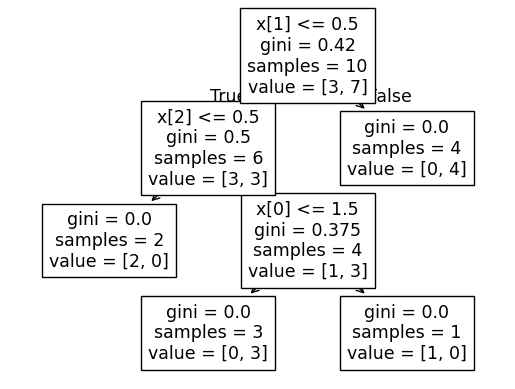

In [77]:
from sklearn import tree
tree.plot_tree(clf)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.625, 'Routine <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.375, 'Outlook <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.75, '  False')]

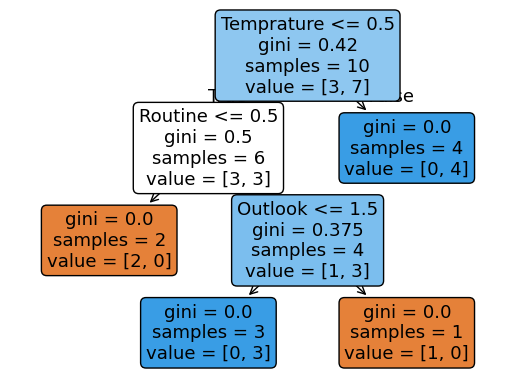

In [78]:
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)

[Text(0.6, 0.875, 'Temprature <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.625, 'Routine <= 0.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5, 0.75, 'True  '),
 Text(0.2, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.375, 'Outlook <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.4, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.8, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.75, '  False')]

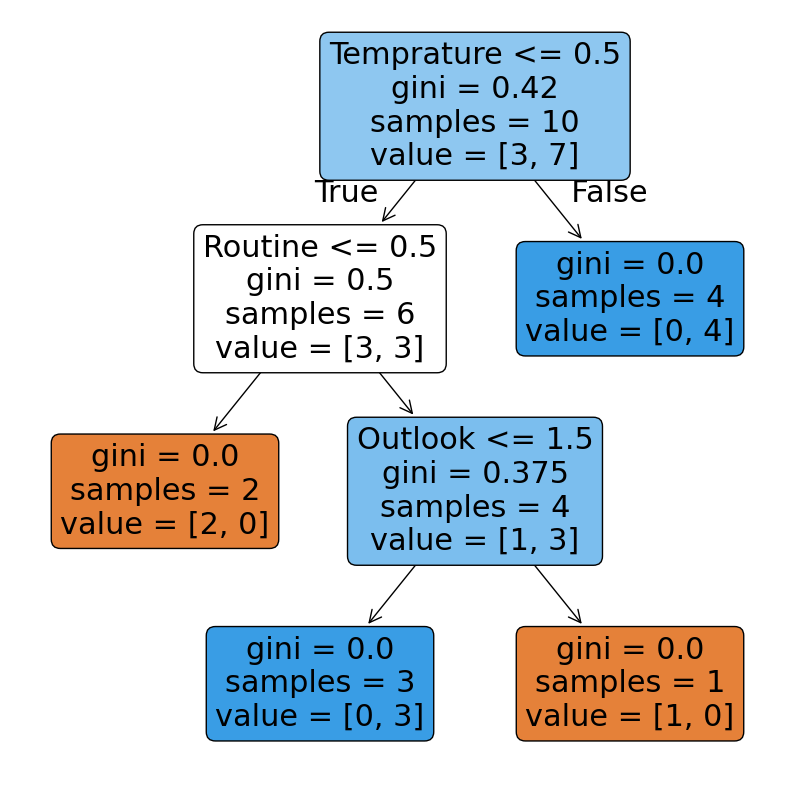

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
tree.plot_tree(clf, filled=True, rounded=True, feature_names=x.columns)
# tree.savefig('tree.png')